## Call the data of NSMC(Naver Sentiment Movie Corpus)

In [1]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]  # txt파일의 헤더(id label)는 제외
    return data

train_data = read_data('data/nsmcData/ratings_train.txt')
test_data = read_data('data/nsmcData/ratings_test.txt')

In [8]:
# Check the loaded data
print(len(train_data))
print(train_data[0])
print(len(test_data))
print(test_data[0])

150000
['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']
50000
['6270596', '굳 ㅋ', '1']


## Preprocessing of NSMC data

#### Using Okt(Open Korean Text) Class provided by KoNLPy

In [3]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos(u'나는 저 하늘을 높이 날고 있어 그때 니가 내게 줬던 두날개로'))

[('나', 'Noun'), ('는', 'Josa'), ('저', 'Noun'), ('하늘', 'Noun'), ('을', 'Josa'), ('높이', 'Noun'), ('날', 'Noun'), ('고', 'Josa'), ('있어', 'Adjective'), ('그때', 'Noun'), ('니', 'Noun'), ('가', 'Josa'), ('내게', 'Verb'), ('줬던', 'Verb'), ('두', 'Determiner'), ('날개', 'Noun'), ('로', 'Josa')]


In [5]:
import os, json
from pprint import pprint

def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('data/nsmcData/train_docs.json'):
    with open('data/nsmcData/train_docs.json') as f:
        train_docs = json.load(f)
    with open('data/nsmcData/test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    
    # save as json file
    with open('data/nsmcData/train_docs.json', 'w', encoding='utf-8') as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('data/nsmcData/test_docs.json', 'w', encoding='utf-8') as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")
        
# Data pretty printer - pprint module
pprint(train_docs[0])

[['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0']


In [9]:
# Check the number of tokens in the analyzed data
tokens = [t for d in  train_docs for t in d[0]]
print(tokens[:10])

['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun', '흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun']


#### Pretreatment vis NLTK

In [10]:
import nltk

text = nltk.Text(tokens, name='NSMC')

print(len(text.tokens))        # Total tokens
print(len(set(text.tokens)))   # Non-Duplicate tokens

pprint(text.vocab().most_common(10))

2159921
49895
[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


#### Graph of 50 most common words using matplotlib

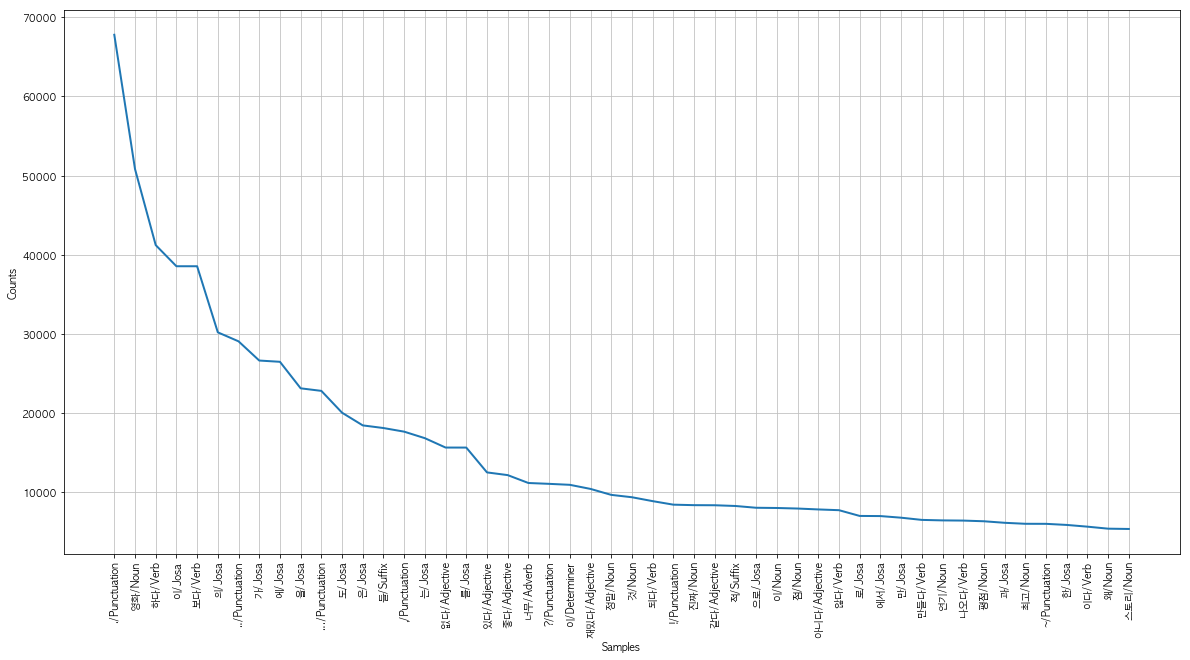

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = '/Library/Fonts/AppleGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20, 10))
text.plot(50)

#### Vectorized using 10,000 commonly used token - Using CountVectorization

In [12]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
train_y = [c for _, c in train_docs]
text_x = [term_frequency(d) for d, _ in test_docs]
test_y = [c for _, c in test_docs]

KeyboardInterrupt: 

#### Change data to float